In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
K = 3
D = 2
N = 1000
Ns = [300, 400, 300]

means = 5*np.random.randn(K, D)
x = []
for n, m in zip(Ns, means):
    #print(n, m)
#     print(np.random.randn(n,D))
    e = np.random.randn(n,D)
    print("E")
    print(e[:2])
    print("m")
    print(m)
    g = e+m
    print("g")
    print(g[:2])
    x.append(g)


E
[[ 1.57921282  0.76743473]
 [-0.46947439  0.54256004]]
m
[ 2.48357077 -0.69132151]
g
[[ 4.06278358  0.07611322]
 [ 2.01409638 -0.14876146]]
E
[[-0.7737892  -1.2446547 ]
 [-1.77872025  1.49604431]]
m
[3.23844269 7.61514928]
g
[[2.46465349 6.37049458]
 [1.45972244 9.11119359]]
E
[[-1.42181067  1.50133365]
 [-0.32267984 -0.25083302]]
m
[-1.17076687 -1.17068478]
g
[[-2.59257754  0.33064887]
 [-1.49344671 -1.4215178 ]]


In [3]:
[x_.shape for x_ in x]

[(300, 2), (400, 2), (300, 2)]

In [4]:
m

array([-1.17076687, -1.17068478])

[ 2.48357077 -0.69132151]
[3.23844269 7.61514928]
[-1.17076687 -1.17068478]


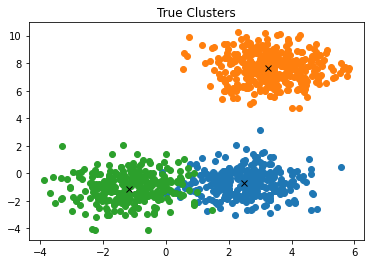

In [5]:
for x_,m in zip(x, means):
    print(m)
    plt.scatter(x_[:,0], x_[:,1])
    plt.plot(m[0], m[1], 'kx')
plt.title('True Clusters')    
plt.show()

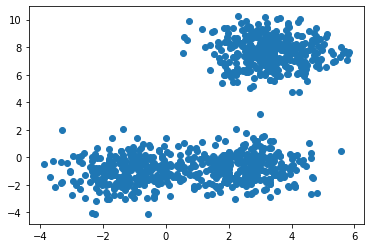

(1000, 2)

In [6]:
data = np.vstack(x)
plt.scatter(data[:,0],data[:,1])
plt.show()
data.shape

In [7]:
def distance_matrix(x, m):
    """
    Calculates the distance from each element x to each element in m.
    Parameters:
    - x: data points
    - m: possible means
    Returns:
    - distance matrix
    """
    d = np.zeros((len(x), len(m)))
    for i in range(len(x)):
        for j in range(len(m)):
            d[i, j] = dist(x[i,:], m[j,:])
            
    return d

def dist(x1, x2, axis=None):
    """
    Calculate euclidean distance
    """
    return np.sqrt(np.sum(np.square(x1-x2), axis))

Test out the distance matrix algorithm

In [8]:
x_test = np.array([[0, 1], [1, 0], [0, 0], [1, 1]])
m_test = np.array([[0, 1], [1, 0], [0, 0]])

distance_matrix(x_test, m_test)

array([[0.        , 1.41421356, 1.        ],
       [1.41421356, 0.        , 1.        ],
       [1.        , 1.        , 0.        ],
       [1.        , 1.        , 1.41421356]])

[[0.         1.41421356 1.        ]
 [1.41421356 0.         1.        ]
 [1.         1.         0.        ]
 [1.         1.         1.41421356]]


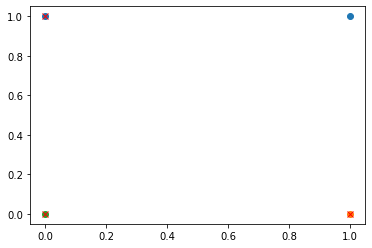

In [16]:
# import numpy as np
e = distance_matrix(x_test, m_test)
print(e)
cluster = e.argmin(axis=-1)
for j in range(k):
    idx = cluster == j 
    plt.plot(m_test[j, 0], m_test[j, 1], "rx")
    plt.scatter(x_test[idx, 0], x_test[idx, 1])
    # calculate new mean
plt.show()

## broadcasting

In [10]:
def dist(x1, x2, axis=-1):
    """
    Calculate euclidean distance
    """
    # breakpoint()
    return np.sqrt(np.sum(np.square(x1-x2), axis))

def distance_matrix2(x, m):
    # breakpoint()
    d = [dist(x, m_, axis=1) for m_ in m]
    d = np.stack(d, axis=1)

    return d

In [11]:
distance_matrix2(x_test, x_test)

array([[0.        , 1.41421356, 1.        , 1.        ],
       [1.41421356, 0.        , 1.        , 1.        ],
       [1.        , 1.        , 0.        , 1.41421356],
       [1.        , 1.        , 1.41421356, 0.        ]])

K-means algorithm

In [12]:
data.shape

(1000, 2)

> <ipython-input-17-577be5bdb71a>(16)<module>()
     13         plt.scatter(data[idx, 0], data[idx, 1])
     14         pdb.set_trace()
     15         # calculate new mean
---> 16         means[j, :] = data[idx].mean(axis=0)
     17     plt.show()

ipdb> n
> <ipython-input-17-577be5bdb71a>(10)<module>()
      8     # breakpoint()
      9     cluster = d.argmin(axis=-1)  #tao ra 1 mang gom cac index co gia tri nho nhat theo tung hang cua ma tran khoang cach
---> 10     for j in range(k):
     11         idx = cluster == j
     12         plt.plot(means[j, 0], means[j, 1], "rx")

ipdb> n
> <ipython-input-17-577be5bdb71a>(11)<module>()
      9     cluster = d.argmin(axis=-1)  #tao ra 1 mang gom cac index co gia tri nho nhat theo tung hang cua ma tran khoang cach
     10     for j in range(k):
---> 11         idx = cluster == j
     12         plt.plot(means[j, 0], means[j, 1], "rx")
     13         plt.scatter(data[idx, 0], data[idx, 1])

ipdb> n
> <ipython-input-17-577be5bdb71a>(12)<mod

ipdb> n
> <ipython-input-17-577be5bdb71a>(11)<module>()
      9     cluster = d.argmin(axis=-1)  #tao ra 1 mang gom cac index co gia tri nho nhat theo tung hang cua ma tran khoang cach
     10     for j in range(k):
---> 11         idx = cluster == j
     12         plt.plot(means[j, 0], means[j, 1], "rx")
     13         plt.scatter(data[idx, 0], data[idx, 1])

ipdb> plt.show()


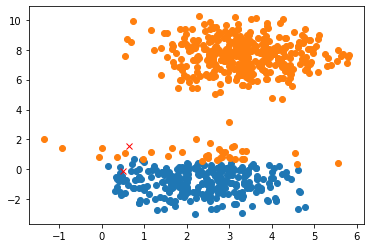

ipdb> n
> <ipython-input-17-577be5bdb71a>(12)<module>()
     10     for j in range(k):
     11         idx = cluster == j
---> 12         plt.plot(means[j, 0], means[j, 1], "rx")
     13         plt.scatter(data[idx, 0], data[idx, 1])
     14         pdb.set_trace()

ipdb> n
> <ipython-input-17-577be5bdb71a>(13)<module>()
     11         idx = cluster == j
     12         plt.plot(means[j, 0], means[j, 1], "rx")
---> 13         plt.scatter(data[idx, 0], data[idx, 1])
     14         pdb.set_trace()
     15         # calculate new mean

ipdb> n
> <ipython-input-17-577be5bdb71a>(14)<module>()
     12         plt.plot(means[j, 0], means[j, 1], "rx")
     13         plt.scatter(data[idx, 0], data[idx, 1])
---> 14         pdb.set_trace()
     15         # calculate new mean
     16         means[j, :] = data[idx].mean(axis=0)

ipdb> plt.show()


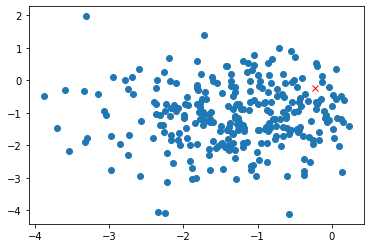

ipdb> n
> <ipython-input-17-577be5bdb71a>(16)<module>()
     13         plt.scatter(data[idx, 0], data[idx, 1])
     14         pdb.set_trace()
     15         # calculate new mean
---> 16         means[j, :] = data[idx].mean(axis=0)
     17     plt.show()

ipdb> s
--Call--
> c:\programdata\anaconda3\lib\site-packages\numpy\core\_methods.py(143)_mean()
    141             um.clip, a, min, max, out=out, casting=casting, **kwargs)
    142 
--> 143 def _mean(a, axis=None, dtype=None, out=None, keepdims=False):
    144     arr = asanyarray(a)
    145 

ipdb> s
> c:\programdata\anaconda3\lib\site-packages\numpy\core\_methods.py(144)_mean()
    142 
    143 def _mean(a, axis=None, dtype=None, out=None, keepdims=False):
--> 144     arr = asanyarray(a)
    145 
    146     is_float16_result = False

ipdb> n
> c:\programdata\anaconda3\lib\site-packages\numpy\core\_methods.py(146)_mean()
    144     arr = asanyarray(a)
    145 
--> 146     is_float16_result = False
    147     rcount = _count_re

BdbQuit: 

In [17]:
import pdb
k = 3    #so cluster
iters = 10  #so lan lap
np.random.seed(42) 
means = np.random.randn(k, data.shape[1]) #tao ra 3 diem mean
for i in range(iters):  # chay iters lan 0->iters-1
    d = distance_matrix(data, means) #tinh ra 1 ma tran khoang cach tu moi diem mean toi cac diem trong data
    # breakpoint()
    cluster = d.argmin(axis=-1)  #tao ra 1 mang gom cac index co gia tri nho nhat theo tung hang cua ma tran khoang cach
    for j in range(k):
        idx = cluster == j 
        plt.plot(means[j, 0], means[j, 1], "rx")
        plt.scatter(data[idx, 0], data[idx, 1])
        pdb.set_trace()
        # calculate new mean
        means[j, :] = data[idx].mean(axis=0)
    plt.show()

In [19]:
j

0